**第7章: 単語ベクトル**

60. 単語ベクトルの読み込みと表示

In [2]:
import gdown
gdown.download('https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM', 'GoogleNews-vectors-negative300.bin.gz', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
From (redirected): https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&confirm=t&uuid=04b5fd57-612c-4b22-9b68-05efef9a4b13
To: /content/GoogleNews-vectors-negative300.bin.gz
100%|██████████| 1.65G/1.65G [00:11<00:00, 149MB/s]


'GoogleNews-vectors-negative300.bin.gz'

In [ ]:
from gensim.models import KeyedVectors

# 学習済みモデルのロード
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [ ]:
# 単語ベクトルの表示
model['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

61. 単語の類似度

In [ ]:
model.similarity('United_States', 'U.S.')

0.73107743

In [ ]:
model.similarity('United_States', 'LLM')

-0.014373163

62. 類似度の高い単語10件

In [ ]:
model.most_similar('United_States', topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370987892151),
 ('United_Sates', 0.7400724291801453),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.601906955242157)]

63. 加法構成性によるアナロジー

In [ ]:
model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10)

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.560684859752655),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862097740173),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166865587234497),
 ('Iraklion', 0.5146791338920593)]

64. アナロジーデータでの実験

In [ ]:
!wget http://download.tensorflow.org/data/questions-words.txt

--2025-01-19 18:20:24--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.101.207, 142.251.2.207, 142.250.141.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.101.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.003s  

2025-01-19 18:20:25 (198 MB/s) - ‘questions-words.txt’ saved [603955/603955]



In [ ]:
!head -10 questions-words.txt

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany
Athens Greece Bern Switzerland
Athens Greece Cairo Egypt
Athens Greece Canberra Australia
Athens Greece Hanoi Vietnam
Athens Greece Havana Cuba


In [ ]:
with open('./questions-words.txt', 'r') as f1, open('./questions-words-add.txt', 'w') as f2:
  for line in f1:  # f1から1行ずつ読込み、求めた単語と類似度を追加してf2に書込む
    line = line.split()
    if line[0] == ':':
      category = line[1]
      print(category)
    else:
      word, cos = model.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn=1)[0]
      f2.write(' '.join([category] + line + [word, str(cos) + '\n']))

capital-common-countries
capital-world
currency
city-in-state
family
gram1-adjective-to-adverb
gram2-opposite
gram3-comparative
gram4-superlative
gram5-present-participle
gram6-nationality-adjective
gram7-past-tense
gram8-plural
gram9-plural-verbs


In [ ]:
!head -10 questions-words-add.txt

capital-common-countries Athens Greece Baghdad Iraq Iraqi 0.635187029838562
capital-common-countries Athens Greece Bangkok Thailand Thailand 0.7137669324874878
capital-common-countries Athens Greece Beijing China China 0.7235778570175171
capital-common-countries Athens Greece Berlin Germany Germany 0.6734622716903687
capital-common-countries Athens Greece Bern Switzerland Switzerland 0.4919748306274414
capital-common-countries Athens Greece Cairo Egypt Egypt 0.7527808547019958
capital-common-countries Athens Greece Canberra Australia Australia 0.583732545375824
capital-common-countries Athens Greece Hanoi Vietnam Viet_Nam 0.6276341676712036
capital-common-countries Athens Greece Havana Cuba Cuba 0.6460990905761719
capital-common-countries Athens Greece Helsinki Finland Finland 0.68999844789505


65. アナロジータスクでの正解率

In [ ]:
with open('./questions-words-add.txt', 'r') as f:
  sem_cnt = 0
  sem_cor = 0
  syn_cnt = 0
  syn_cor = 0
  for line in f:
    line = line.split()
    if not line[0].startswith('gram'):
      sem_cnt += 1
      if line[4] == line[5]:
        sem_cor += 1
    else:
      syn_cnt += 1
      if line[4] == line[5]:
        syn_cor += 1

print(f'意味的アナロジー正解率: {sem_cor/sem_cnt:.3f}')
print(f'文法的アナロジー正解率: {syn_cor/syn_cnt:.3f}')

意味的アナロジー正解率: 0.731
文法的アナロジー正解率: 0.738


66. WordSimilarity-353での評価

In [ ]:
!wget http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
!unzip wordsim353.zip

--2025-01-20 20:45:03--  http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving www.gabrilovich.com (www.gabrilovich.com)... 173.236.137.139
Connecting to www.gabrilovich.com (www.gabrilovich.com)|173.236.137.139|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip [following]
--2025-01-20 20:45:03--  https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving gabrilovich.com (gabrilovich.com)... 173.236.137.139
Connecting to gabrilovich.com (gabrilovich.com)|173.236.137.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘wordsim353.zip’

wordsim353.zip      100%[===================>]  22.71K   104KB/s    in 0.2s    

2025-01-20 20:45:05 (104 KB/s) - ‘wordsim353.zip’ saved [23257/23257]

Archive:  wordsim353.zip
  inflating: combined.csv            
  inflating: set1.csv           

In [ ]:
!head -10 'combined.csv'

Word 1,Word 2,Human (mean)
love,sex,6.77
tiger,cat,7.35
tiger,tiger,10.00
book,paper,7.46
computer,keyboard,7.62
computer,internet,7.58
plane,car,5.77
train,car,6.31
telephone,communication,7.50


In [ ]:
ws353 = []
with open('combined.csv', 'r') as f:
  next(f)
  for line in f:  # 1行ずつ読込み、単語ベクトルと類似度を計算
    line = [s.strip() for s in line.split(',')]
    line.append(model.similarity(line[0], line[1]))
    ws353.append(line)

# 確認
for i in range(5):
  print(ws353[i])

['love', 'sex', '6.77', 0.26393774]
['tiger', 'cat', '7.35', 0.5172962]
['tiger', 'tiger', '10.00', 0.99999994]
['book', 'paper', '7.46', 0.3634626]
['computer', 'keyboard', '7.62', 0.39639163]


In [ ]:
import numpy as np
from scipy.stats import spearmanr

# スピアマン相関係数の計算
human = np.array(ws353).T[2]
w2v = np.array(ws353).T[3]
correlation, pvalue = spearmanr(human, w2v)

print(f'スピアマン相関係数: {correlation:.3f}')

スピアマン相関係数: 0.685


67. k-meansクラスタリング

In [ ]:
# 国名の取得
countries = set()
with open('questions-words-add.txt') as f:
  for line in f:
    line = line.split()
    if line[0] in ['capital-common-countries', 'capital-world']:
      countries.add(line[2])
    elif line[0] in ['currency', 'gram6-nationality-adjective']:
      countries.add(line[1])
countries = list(countries)

# 単語ベクトルの取得
countries_vec = [model[country] for country in countries]

In [ ]:
from sklearn.cluster import KMeans

import numpy as np
# k-meansクラスタリング
kmeans = KMeans(n_clusters=5)
kmeans.fit(countries_vec)
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('cluster', i)
    print(', '.join([countries[k] for k in cluster]))

cluster 0
Somalia, Lebanon, Qatar, Iran, Egypt, Syria, Israel, Greenland, Bahrain, Libya, Oman, Afghanistan, Iraq, Jordan, Morocco
cluster 1
Madagascar, Nigeria, Kenya, Eritrea, Niger, Zimbabwe, Malawi, Ghana, Rwanda, Burundi, Gambia, Gabon, Mozambique, Namibia, Algeria, Botswana, Mauritania, Uganda, Angola, Zambia, Liberia, Mali, Sudan, Tunisia, Senegal, Guinea
cluster 2
Slovenia, Montenegro, Macedonia, Albania, Serbia, Croatia, Moldova
cluster 3
India, Jamaica, Malaysia, Australia, Ecuador, Tajikistan, Chile, Taiwan, Suriname, Laos, Thailand, Nicaragua, Mexico, Colombia, Belize, Canada, Turkmenistan, Vietnam, Indonesia, Dominica, Cuba, Korea, Pakistan, Kyrgyzstan, China, Peru, Samoa, Uzbekistan, Fiji, Bahamas, Bangladesh, Venezuela, Japan, Guyana, USA, Cambodia, Nepal, Brazil, Bhutan, Philippines, Honduras, Tuvalu
cluster 4
Lithuania, France, Germany, Turkey, Argentina, Portugal, Estonia, Liechtenstein, Azerbaijan, Netherlands, Norway, Italy, Spain, Hungary, Bulgaria, Austria, Europe

68. Ward法によるクラスタリング

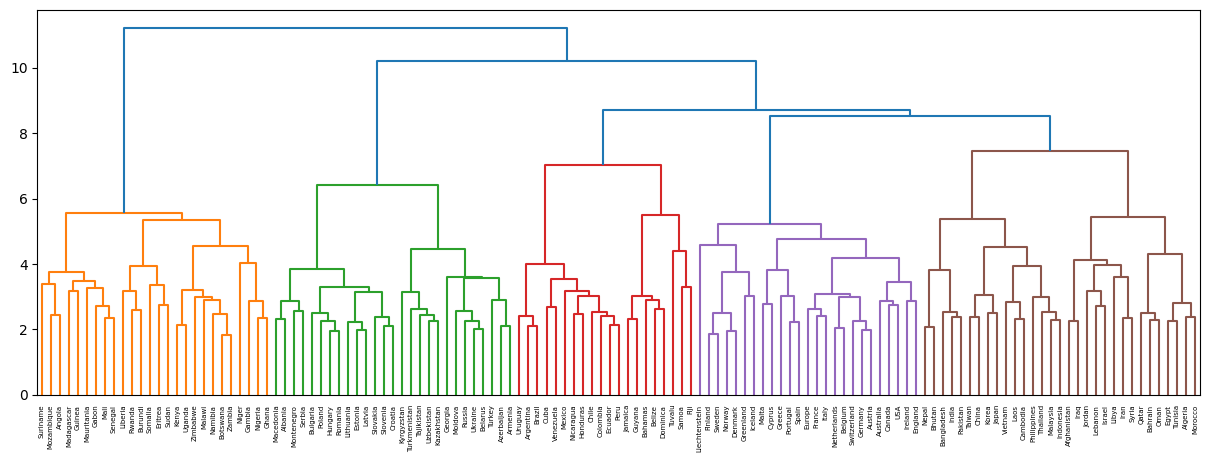

In [ ]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(15, 5))
Z = linkage(countries_vec, method='ward')
dendrogram(Z, labels=countries)
plt.show()

69. t-SNEによる可視化

In [ ]:
!pip install bhtsne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.2/86.2 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bhtsne: filename=bhtsne-0.1.9-cp311-cp311-linux_x86_64.whl size=280964 sha256=52cb6491557a0fd8271f4d419b5b2c56a0b355bb8883140d27f165dd2ad92216
  Stored in directory: /root/.cache/pip/wheels/c7/e0/05/ef25429ca93e3ccaddddb1ed036fb692b6b99f078b83937842
Successfully built bhtsne


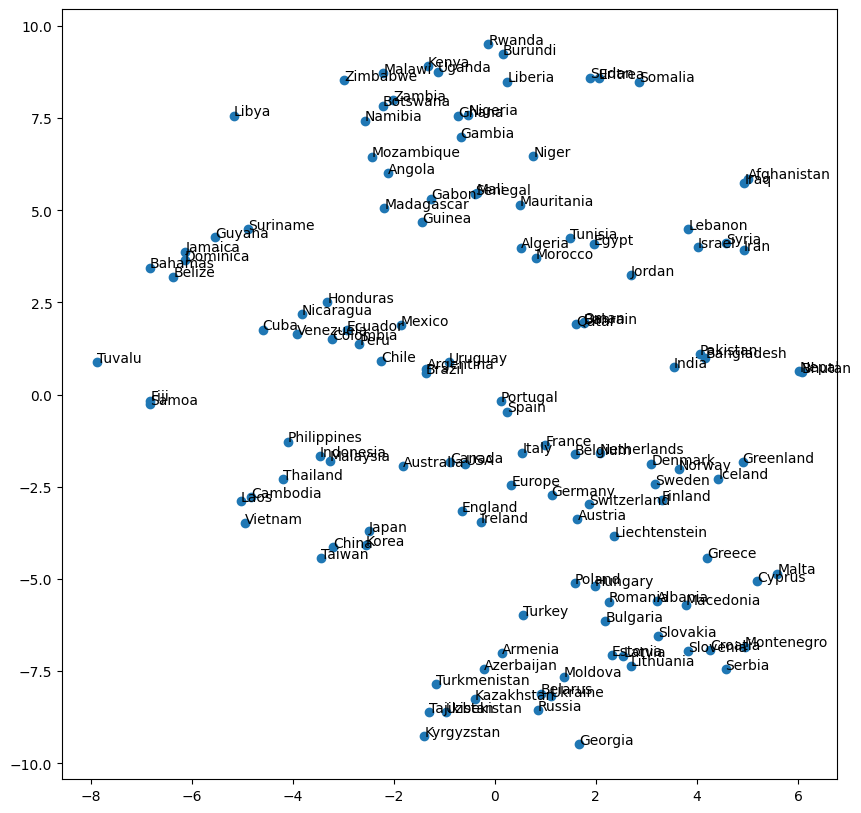

In [ ]:
import bhtsne

embedded = bhtsne.tsne(np.array(countries_vec).astype(np.float64), dimensions=2, rand_seed=123)
plt.figure(figsize=(10, 10))
plt.scatter(np.array(embedded).T[0], np.array(embedded).T[1])
for (x, y), name in zip(embedded, countries):
    plt.annotate(name, (x, y))
plt.show()